# เตรียมข้อมูล

In [91]:
import os
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [92]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [93]:
orig_df = pd.read_excel("clust_data63.xlsx")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,งบกลาง,10464.6,85315,69550,329166.3,24275,518770.9
1,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9
2,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4
3,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0
4,กระทรวงการต่างประเทศ,2754,2558.6,468.3,1483.9,1662.8,8927.6
5,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5
8,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7
9,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1


In [94]:
orig_df.drop([0,21,22,23,24,25,26,27,28,29,30,31,32,33], inplace=True)
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9
2,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4
3,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0
4,กระทรวงการต่างประเทศ,2754,2558.6,468.3,1483.9,1662.8,8927.6
5,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5
8,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7
9,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1
10,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517,1385.6,1927.9,794,6897.9


In [95]:
orig_df.to_csv(r'clustering_data63.csv', index = False, header=True)

# Kmean

In [96]:
df = pd.read_csv("clustering_data63.csv")
df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9
1,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4
2,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0
3,กระทรวงการต่างประเทศ,2754.0,2558.6,468.3,1483.9,1662.8,8927.6
4,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5
7,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7
8,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517.0,1385.6,1927.9,794.0,6897.9


<AxesSubplot:>

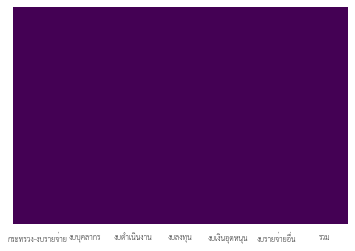

In [97]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [98]:
df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,27225.015000,6441.115000,18301.725000,27686.980000,19551.445000,99206.28000
std,55352.177248,7170.188098,38350.702745,61778.268919,53156.425457,118720.04181
min,808.600000,536.700000,468.300000,31.200000,154.900000,2158.00000
25%,2326.875000,1494.850000,831.300000,840.475000,772.725000,8315.55000
50%,6880.300000,2685.400000,3722.550000,1705.900000,1797.500000,34739.45000
75%,14609.425000,10202.525000,15941.575000,11472.500000,3451.825000,148757.37500
max,230196.300000,24777.800000,165887.200000,256160.300000,225866.300000,368660.30000


In [99]:
ddf = df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
ddf.tail()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
15,3654.6,1516.4,489.6,54593.0,624.8
16,2352.7,1430.2,2391.5,1273.7,1121.6
17,230196.3,19847.4,22527.3,89316.7,6772.6
18,99248.1,14860.6,17465.5,6945.7,209.9
19,1633.6,620.1,844.3,218.6,2047.2


จะไม่ตัด Outlier ออกเนื่องจากต้องการเทียบทุกกระทรวง

In [100]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(ddf)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.429076,-0.479867,-0.313928,-0.288389,-0.086763
1,1.207059,2.623786,-0.076730,-0.374074,1.468457
2,-0.261940,0.041952,-0.406457,-0.445300,3.982107
3,-0.453582,-0.555547,-0.477089,-0.435166,-0.345271
4,-0.475852,-0.768707,-0.454414,-0.447507,-0.350474


In [101]:
df_normalized.describe()

,0,1,2,3,4
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,8.881784e-17,-9.992007e-17,4.718448e-17,6.938894e-17,-1.110223e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-4.896405e-01,-8.448596e-01,-4.770892e-01,-4.592915e-01,-3.743750e-01
25%,-4.614986e-01,-7.077584e-01,-4.673781e-01,-4.458515e-01,-3.624503e-01
50%,-3.770988e-01,-5.374032e-01,-3.900298e-01,-4.314790e-01,-3.426710e-01
75%,-2.338358e-01,5.382181e-01,-6.313999e-02,-2.692809e-01,-3.107406e-01
max,3.762167e+00,2.623786e+00,3.948285e+00,3.794355e+00,3.982107e+00


C:\Users\PPUNN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

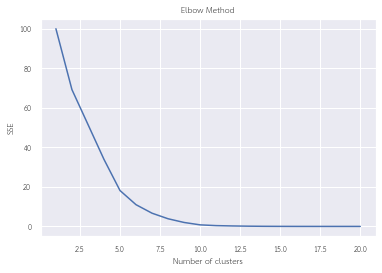

In [102]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

จากกราฟพบว่าค่า k วัดจากจุดที่เปลี่ยนแปลงความชันมากที่สุดอยู่ที่ประมาณ 5

In [103]:
k = 5

In [104]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [105]:
cluster_predictions = kmeans.predict(df_normalized)
ddf['cluster_id'] = cluster_predictions
ddf.tail(10)

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_4744/579068457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
10,11012.2,5924.0,10285.0,1216.6,1932.2,1
11,808.6,536.7,489.1,31.2,292.4,1
12,2249.4,1636.9,792.3,529.6,2344.9,1
13,19158.1,13538.0,34694.8,256160.3,29456.2,4
14,10254.9,9090.7,4336.6,1112.4,2154.5,1
15,3654.6,1516.4,489.6,54593.0,624.8,1
16,2352.7,1430.2,2391.5,1273.7,1121.6,1
17,230196.3,19847.4,22527.3,89316.7,6772.6,0
18,99248.1,14860.6,17465.5,6945.7,209.9,0
19,1633.6,620.1,844.3,218.6,2047.2,1


In [106]:
ddf.cluster_id.value_counts()

1    13
0     3
3     2
2     1
4     1
Name: cluster_id, dtype: int64

## silhouette_score

In [107]:
print(metrics.silhouette_score(ddf,kmeans.labels_))

0.5089320697748997


silhouette_score ยิ่งใกล้เคียง 1 ยิ่งแม่นยำ

## davies_bouldin_score

In [108]:
print(metrics.davies_bouldin_score(ddf,kmeans.labels_))

0.6114812279013346


davies_bouldin_score ยิ่งใกล้เคียง 0 ยิ่งแม่นยำ

## 5 Clusters

#### Cluster 0

In [109]:
ddf[ddf.cluster_id==0].mean()

งบบุคลากร        140597.000000
งบดําเนินงาน      19828.600000
งบลงทุน           18475.466667
งบเงินอุดหนุน     33808.300000
งบรายจ่ายอื่น     34205.133333
cluster_id            0.000000
dtype: float64

In [110]:
df[ddf.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,233353.4
17,กระทรวงศึกษาธิการ,230196.3,19847.4,22527.3,89316.7,6772.6,368660.3
18,กระทรวงสาธารณสุข,99248.1,14860.6,17465.5,6945.7,209.9,138729.8


#### Cluster 1

In [111]:
ddf[ddf.cluster_id==1].mean()

งบบุคลากร         4312.861538
งบดําเนินงาน      2523.992308
งบลงทุน           3007.853846
งบเงินอุดหนุน    14809.292308
งบรายจ่ายอื่น     2424.838462
cluster_id           1.000000
dtype: float64

In [112]:
df[ddf.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,39108.9
3,กระทรวงการต่างประเทศ,2754.0,2558.6,468.3,1483.9,1662.8,8927.6
4,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,6071.3
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,21281.6
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,127895.5
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517.0,1385.6,1927.9,794.0,6897.9
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11012.2,5924.0,10285.0,1216.6,1932.2,30370.0
11,กระทรวงพลังงาน,808.6,536.7,489.1,31.2,292.4,2158.0
12,กระทรวงพาณิชย์,2249.4,1636.9,792.3,529.6,2344.9,7553.1
14,กระทรวงยุติธรรม,10254.9,9090.7,4336.6,1112.4,2154.5,26949.1


#### Cluster 2

In [113]:
ddf[ddf.cluster_id==2].mean()

งบบุคลากร         13093.2
งบดําเนินงาน       6734.3
งบลงทุน            3108.5
งบเงินอุดหนุน       873.7
งบรายจ่ายอื่น    225866.3
cluster_id            2.0
dtype: float64

In [114]:
df[ddf.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,249676.0


#### Cluster 3

In [115]:
ddf[ddf.cluster_id==3].mean()

งบบุคลากร         17195.40
งบดําเนินงาน       8126.15
งบลงทุน          116851.35
งบเงินอุดหนุน      1379.95
งบรายจ่ายอื่น       784.05
cluster_id            3.00
dtype: float64

In [116]:
df[ddf.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
7,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,109833.7
8,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,178840.1


#### Cluster 4

In [117]:
ddf[ddf.cluster_id==4].mean()

งบบุคลากร         19158.1
งบดําเนินงาน      13538.0
งบลงทุน           34694.8
งบเงินอุดหนุน    256160.3
งบรายจ่ายอื่น     29456.2
cluster_id            4.0
dtype: float64

In [118]:
df[ddf.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
13,กระทรวงมหาดไทย,19158.1,13538.0,34694.8,256160.3,29456.2,353007.4
